# Task-2 MNIST Digit Recognition #

## importing necessary libraries ##

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

C:\Users\MY\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## load the dataset ##

In [2]:
(train_image, train_label), (test_image, test_label) = mnist.load_data()

## Data Exploration ##

In [3]:
print("training image shape:", train_image.shape)
print("training label shape:", train_label.shape)
print("test image shape:", test_image.shape)
print("test label shape:", test_label.shape)

training image shape: (60000, 28, 28)
training label shape: (60000,)
test image shape: (10000, 28, 28)
test label shape: (10000,)


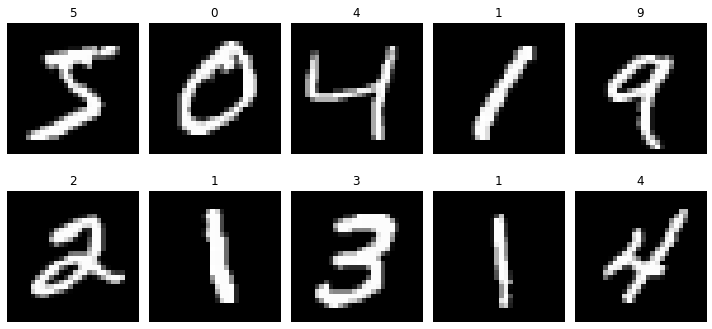

In [4]:
#display some sample images
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2, 5, i+1) #create a grid of 2 rows and 5 columns
    plt.imshow(train_image[i], cmap="gray") #Display image
    plt.title(str(train_label[i])) #Display title
    plt.axis("off") #Turn of Axis labels
plt.tight_layout()
plt.show()

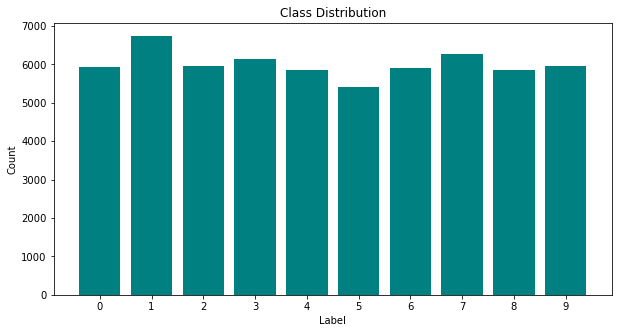

In [5]:
# display class distribution
plt.figure(figsize=(10,5))
unique_labels, label_counts = np.unique(train_label, return_counts=True)
plt.bar(unique_labels, label_counts, color="teal")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(unique_labels)
plt.show()


## Data Preprocessing ##

In [6]:
#rescale pixel value to the range[0,1]
train_image = train_image.astype("float32")/255
test_image = test_image.astype("float32")/255

In [7]:
#covert labels to one-hot encoding
train_label = tf.keras.utils.to_categorical(train_label, num_classes=10)
test_label = tf.keras.utils.to_categorical(test_label, num_classes=10)

## model building and training ##

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_image, train_label, epochs=10, batch_size=64, validation_split=0.2) #model training

Epoch 1/10
750/750 [==============================] - 16s 11ms/step - loss: 0.3681 - accuracy: 0.8938 - val_loss: 0.1821 - val_accuracy: 0.9481
Epoch 2/10
750/750 [==============================] - 7s 10ms/step - loss: 0.1816 - accuracy: 0.9474 - val_loss: 0.1359 - val_accuracy: 0.9609
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1372 - accuracy: 0.9594 - val_loss: 0.1113 - val_accuracy: 0.9670
Epoch 4/10
750/750 [==============================] - 7s 9ms/step - loss: 0.1106 - accuracy: 0.9665 - val_loss: 0.1001 - val_accuracy: 0.9688
Epoch 5/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0939 - accuracy: 0.9721 - val_loss: 0.0950 - val_accuracy: 0.9725
Epoch 6/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0800 - accuracy: 0.9756 - val_loss: 0.0889 - val_accuracy: 0.9731
Epoch 7/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.0865 - val_accuracy: 0.9732
Ep

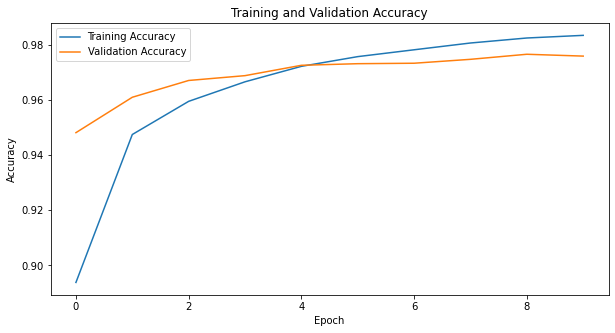

In [10]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

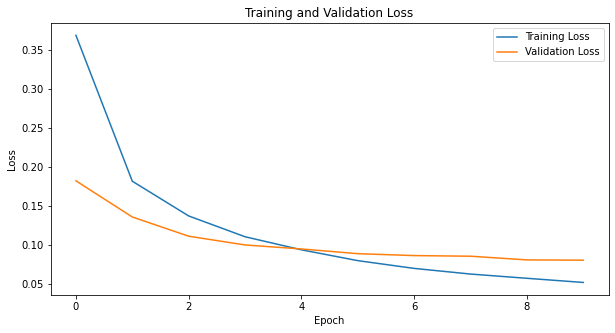

In [11]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## model evaluation ##

In [12]:
test_loss, test_acc = model.evaluate(test_image, test_label)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0694 - accuracy: 0.9794
Test Accuracy: 0.9793999791145325


## Get model prediction ##

In [13]:
predictions = model.predict(test_image)
predicted_label = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_label, axis=1)

313/313 [==============================] - 2s 4ms/step


In [14]:
#confusion matrix
cm = confusion_matrix(true_labels, predicted_label)

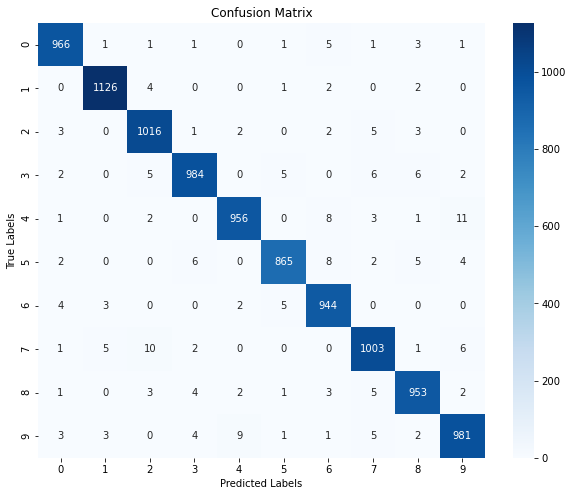

In [15]:
#visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()